## Estimating the bicycle architecture capabilities using random circuits

In [1]:
import os
os.chdir('..')
from analyze import read_numerics
from analyze import process_random_numerics, compute_means, plot_means
from analyze import run_random_numerics

In this notebook, we compute and plot the circuit failure probability for random circuits.

This notebook follows closely the random circuit experiment presented in [_Tour de gross ..._ arxiv:2506.03094](https://arxiv.org/abs/2506.03094). In particular, see Figure 10 on page 29 ([online html](https://ar5iv.labs.arxiv.org/html/2506.03094#S4.F12.sf1)), and Figure 17 on page 66 ([online html](https://ar5iv.labs.arxiv.org/html/2506.03094#A1.F19)).
You'll find docstrings and comments explaining the functions called here in files in the top-level folder `./analyze`.

We assume that the random circuits have already been generated and analyzed and that the results have been collated into a single file. We'll give a brief description of the data below. You can start reading it while you wait 20 seconds for the data to be read.

This data was generated by several instances of the executable `random_numerics`.

## Generating and analyzing random circuits

Generate random circuits, compile them, collect some statistics, write the result to csv files, and collate these files. But only do this if the output file does not already exist.

In [2]:
%time run_random_numerics(overwrite=False, verbose=True)

./data/random_numerics_output.csv not found. Generating data.
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-3 --qubits 121 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --model gross --noise 1e-4 --qubits 110 exited with 0
Run --mode

## Circuit failure probability

In [3]:
%time data = read_numerics("./data/random_numerics_output.csv")

CPU times: user 20.4 s, sys: 1.77 s, total: 22.2 s
Wall time: 22.2 s


The data in `data` consists of eight trials for each of six sets of input parameters. Each set of parameters defines a data set. We partition the data by dataset.

In [4]:
grouped_data = process_random_numerics(data)

104 lines in data set (code=gross, p=0.001, q=5)
800000 lines in data set (code=two-gross, p=0.001, q=50)
800000 lines in data set (code=gross, p=0.0001, q=5)
296392 lines in data set (code=gross, p=0.0001, q=50)
800000 lines in data set (code=two-gross, p=0.0001, q=50)
800000 lines in data set (code=two-gross, p=0.0001, q=500)


Here are the labels on the columns written by `random_numerics`. They are the same for all data sets.

In [5]:
list(grouped_data[('two-gross', 0.001, 50)].keys())

['code',
 'p',
 'i',
 'qubits',
 't_injs',
 'automorphisms',
 'measurements',
 'joint_measurements',
 'measurement_depth',
 'end_time',
 'total_error',
 'mean_error']

In this notebook, we are interested only in 'total_error'. We will compute the mean of this error across the eight trials. Then we will plot the result as a function of the number of logical T gates. Each input instruction in the random circuits is a Pauli-generated rotation with angle $\pi/4$. Upon compilation, each input instruction results, in general, in several ISA instructions of the types in the list above. But each instruction produces only a single T gate. For the coordinate axis, we use the index of the instruction, because for these random circuits, this is the same as the cumulative number of T-gates.

The result of the computation of the means will be written directly into the dict for each data set. This adds a key called "mean_error" to the list above.

In [6]:
compute_means(grouped_data)

Here we plot the mean for each data set.

Compare this plot to Figure 17 on page 66 of [_Tour de gross ..._ arxiv:2506.03094](https://arxiv.org/abs/2506.03094)

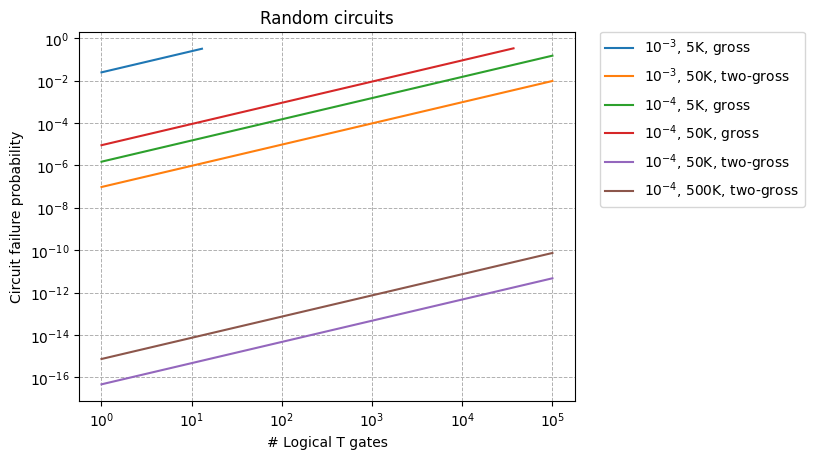

In [7]:
plot_means(grouped_data)